Set-up

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from statannotations.Annotator import Annotator

In [ ]:
os.getcwd()
#working directory should be /Code/CodeFigure5

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure5'

Plotting Ncad Ring Presence in 1 vs 6 weeks for ;10930;>;Atg8a-mCherry-GFP;

Note: You will need to run the StatsNcadAtg8attest.Rmd file first, or annotate out the stats code

In [15]:
csv_path = "../../Data/DataFigure5/Atg8amChGfpNcad_n.csv"
df = pd.read_csv(csv_path)

In [16]:
df['PercentNcad'] = df['Ncad'] * 100

df['Genotype'] = df['Genotype'].replace({
    'Control': '6wk_Control',
    'Exp': '6wk_Exp'
})

df.head(6)

,Weeks,Genotype,Ncad,n,N,PercentNcad
0,6,6wk_Exp,0.6154,39,1,61.54
1,6,6wk_Control,0.3478,23,1,34.78
2,6,6wk_Exp,0.7170,53,2,71.70
3,6,6wk_Control,0.5952,42,2,59.52
4,6,6wk_Exp,0.6923,26,3,69.23
5,6,6wk_Control,0.3889,36,3,38.89


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_96135/1456329969.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_96135/1456329969.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


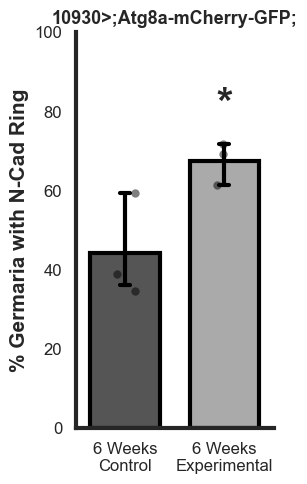

In [17]:
stats_path = "../../Results/ResultsFigure5/StatsNcadAtg8attest.csv"
stats = pd.read_csv(stats_path)

df["Genotype"] = df["Genotype"].astype(str)

genotype_order = ["6wk_Control", "6wk_Exp"]

fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x="Genotype",
    y="PercentNcad",
    order=genotype_order,
    palette="gray",
    capsize=0.1,
    err_kws={"color": "black", "linewidth": 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

sns.stripplot(
    data=df,
    x="Genotype",
    y="PercentNcad",
    order=genotype_order,
    color="black",
    alpha=0.5,
    size=6,
    jitter=True,
    ax=ax
)

y_max = df.groupby("Genotype")["PercentNcad"].max()
offset = 5

for _, row in stats.iterrows():
    comparison = row["comparison"]
    star = row["stars"]

    if comparison == "Control vs Exp":
        x_pos = genotype_order.index("6wk_Exp")
        y_pos = y_max["6wk_Exp"] + offset

        ax.text(
            x=x_pos,
            y=y_pos,
            s=star,
            ha="center",
            va="bottom",
            fontsize=30,
            fontweight="bold"
        )

plt.ylim(0, 100)
plt.ylabel("% Germaria with N-Cad Ring", fontsize=15, weight="bold")
plt.xlabel("")
ax.set_xticklabels([
    "6 Weeks\nControl",
    "6 Weeks\nExperimental"
])
plt.title('10930>;Atg8a-mCherry-GFP;', fontsize=13, weight='bold')
ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure5', 'NcadAtg8amChGfp.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(filename, format='pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()
